### Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Data 

In [11]:
# df = pd.read_csv('datasets/train.csv', keep_default_na=False, na_values=[''])
# use if needed

In [31]:
df = pd.read_csv('datasets/train.csv')
df = df.rename(str.lower, axis=1)
df.columns = [name.replace(' ', '_') if ' ' in name else name for name in df.columns]

#### Model 1
* gr_liv_area
* neighborhood
* year_built
* overall_cond
* bedroom_abvgr
* mo_sold


### Think about:
* overall_qual - it's ordinal

In [4]:
features_1 = df[['gr_liv_area', 'bedroom_abvgr', 'year_built', 'overall_qual', 'mo_sold', 'saleprice']]

In [5]:
df['overall_qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

In [6]:
# plt.scatter(x=df[''], y=df['saleprice'])

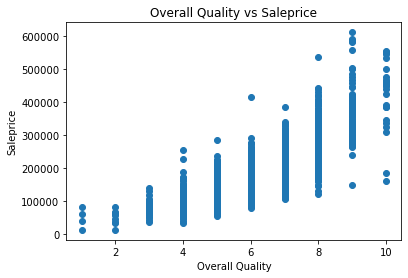

In [78]:
plt.scatter(x=df['overall_qual'], y=df['saleprice'])
plt.xlabel('Overall Quality')
plt.ylabel('Saleprice')
plt.title('Overall Quality vs Saleprice');

Text(0.5, 1.0, 'Year built vs Saleprice')

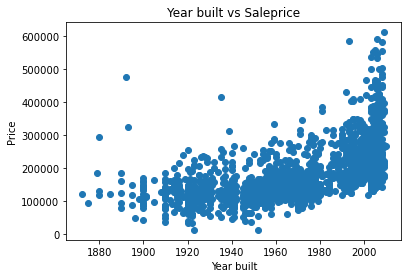

In [70]:
plt.scatter(x=df['year_built'], y=df['saleprice'])
plt.xlabel('Year built')
plt.ylabel('Price')
plt.title('Year built vs Saleprice')

In [ ]:
# interesting behavior from 2000 ownards, perhaps control for discrepency 

Text(0.5, 1.0, 'Year Built vs Sale Price')

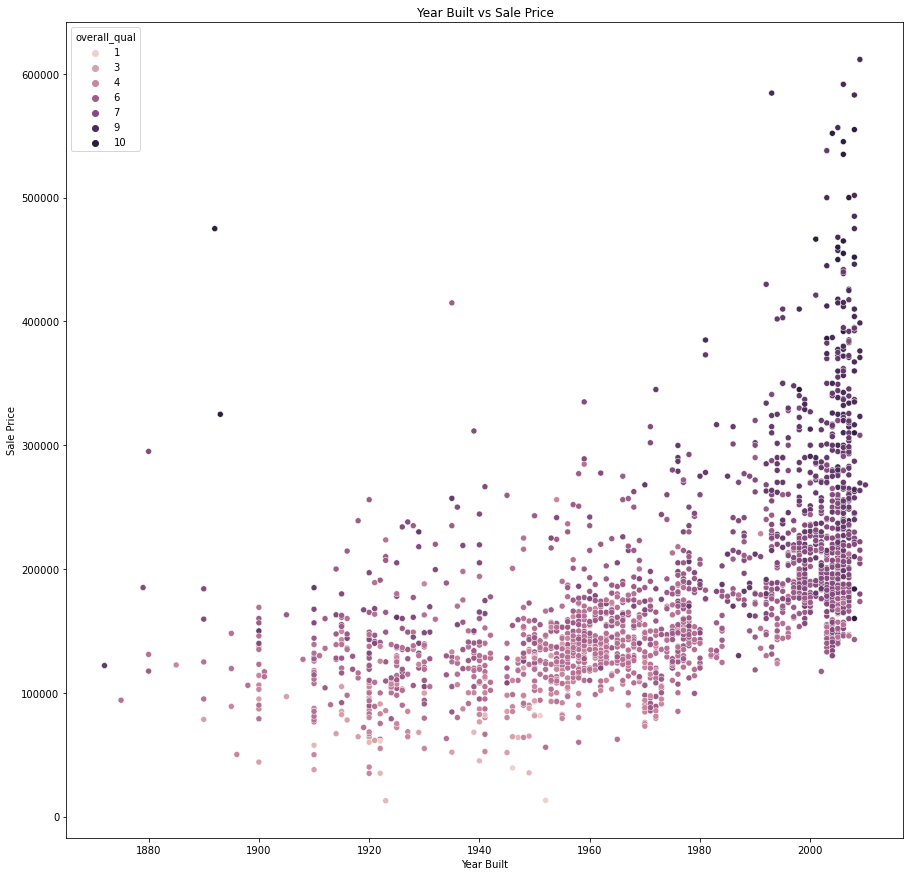

In [71]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=df['year_built'], y=df['saleprice'], hue=df['overall_qual'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Year Built vs Sale Price')

In [ ]:
# help from TA

In [10]:
# interaction = year_built *

In [11]:
# test_1 = pd.concat([df['saleprice'], test], axis=1)

<AxesSubplot:>

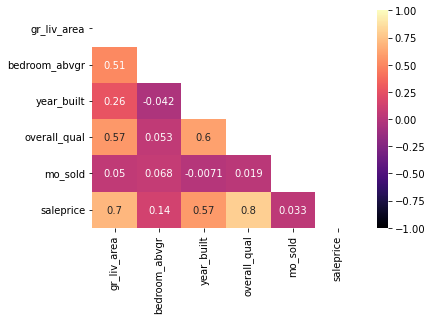

In [12]:
mask = np.zeros_like(features_1.corr())                 
mask[np.triu_indices_from(mask)] = True     
sns.heatmap(features_1.corr(), vmin=-1, vmax=1, annot=True, cmap='magma', mask=mask)

In [13]:
# correlation of errors with unused features
# scatter plot of unused features 


In [14]:
pd.get_dummies(features_1, columns=['mo_sold']);
months = pd.get_dummies(features_1['mo_sold'], drop_first=True)
features_months = pd.concat([features_1, months], axis=1)
features_months.drop(columns='saleprice', inplace=True)

In [15]:
# features_1 + months
X = features_months
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1.score(X_train, y_train), model_1.score(X_test, y_test)

(0.7494608613959601, 0.7894826963216993)

### Models

##### Model_1

In [16]:
X = df[['gr_liv_area', 'bedroom_abvgr', 'year_built', 'overall_qual', 'mo_sold']]
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1.score(X_train, y_train), model_1.score(X_test, y_test)

# Baseline

(0.7475696123861226, 0.791627344459805)

##### Residuals_1

In [17]:
y_preds = model_1.predict(X_test)
resids = y_test-y_preds                     
resids.mean() 

1426.515096620317

##### Metrics_1

In [18]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(model_1, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 26381.478066379048
RMSE = 35768.88673326801
CVS = 0.7359459712700795


In [19]:
r2_score(y_test, y_preds)

0.791627344459805

##### Model_2

###### Feature Engineering

In [20]:
df['age'] = [df['year_built'].max()-year for year in df['year_built']]

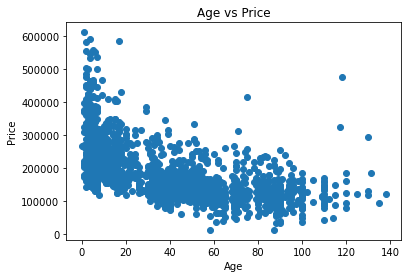

In [80]:
plt.scatter(x=df['age'], y=df['saleprice'])
plt.title('Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price');

In [22]:
df['age**2'] = df['age']**2

In [23]:
df['age*overall_qual'] = df['age']*df['overall_qual']

In [24]:
X = df[['gr_liv_area', 'bedroom_abvgr', 'age','overall_qual', 'age*overall_qual']]
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
model_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.7624149342892661, 0.8096322397498293)

##### Residuals_2

In [25]:
y_preds = model_2.predict(X_test)           # let's predict
resids = y_test-y_preds                     
resids.mean()

963.7928411274389

##### Metrics_2

In [26]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(model_2, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 24815.85540669356
RMSE = 34188.63489216771
CVS = 0.7505755870960968


In [27]:
r2_score(y_test, y_preds)

0.8096322397498293

#### Summary after model 2
* All metrics have improved, still underfit, add more

###### Feature Engineering

In [28]:
features_3 = df[['gr_liv_area', 'bedroom_abvgr', 'age','overall_qual', 'age*overall_qual']]

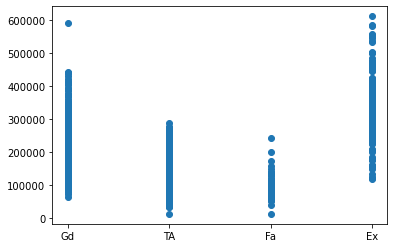

In [29]:
plt.scatter(x=df['kitchen_qual'], y=df['saleprice']); # not in order but there is a clear relationship

In [81]:
## out of order 

In [30]:
pd.get_dummies(df, columns=['kitchen_qual'])
price = df[['saleprice']]
kitchen_qual = pd.get_dummies(df['kitchen_qual'], drop_first=True)
features_3_kitchen_qual = pd.concat([features_3, kitchen_qual], axis=1)
# features_3_kitchen_qual_price = pd.concat([features_3_kitchen_qual, price], axis=1)

##### Model_3

In [31]:
X = features_3_kitchen_qual
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_3 = LinearRegression()
model_3.fit(X_train, y_train)
model_3.score(X_train, y_train), model_3.score(X_test, y_test)

(0.7871201353769511, 0.8298152732275434)

##### Residuals_3

In [32]:
y_preds = model_3.predict(X_test)           # let's predict
resids = y_test-y_preds                     
resids.mean()

774.5844405947302

##### Metrics_3

In [33]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(model_3, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 22975.059463884936
RMSE = 32325.507437689044
CVS = 0.7737243711375728


In [34]:
r2_score(y_test, y_preds)

0.8298152732275434

In [35]:
df[['overall_qual', 'saleprice', 'year_remod/add', 'bedroom_abvgr' , 'gr_liv_area']].corr()

,overall_qual,saleprice,year_remod/add,bedroom_abvgr,gr_liv_area
overall_qual,1.000000,0.800207,0.584654,0.053373,0.566701
saleprice,0.800207,1.000000,0.550370,0.137067,0.697038
year_remod/add,0.584654,0.550370,1.000000,-0.019748,0.322407
bedroom_abvgr,0.053373,0.137067,-0.019748,1.000000,0.507579
gr_liv_area,0.566701,0.697038,0.322407,0.507579,1.000000


##### Model_4

##### Feature Engineering

In [83]:
df['gr_liv_area/bedroom_abvgr'] = df['gr_liv_area']/df['bedroom_abvgr']

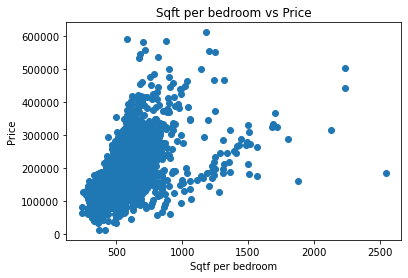

In [85]:
plt.scatter(x=df['gr_liv_area/bedroom_abvgr'], y=df['saleprice'])
plt.title('Sqft per bedroom vs Price')
plt.xlabel('Sqtf per bedroom')
plt.ylabel('Price');

In [38]:
sqft_room = df['gr_liv_area/bedroom_abvgr']

In [39]:
features_4 = pd.concat([features_3_kitchen_qual, sqft_room] ,axis=1)

In [40]:
features_4['gr_liv_area/bedroom_abvgr'].sort_values()

1814    236.8
1823    242.0
1137    245.0
1519    253.0
1156    272.0
        ...  
744       inf
346       inf
1571      inf
191       inf
1308      inf
Name: gr_liv_area/bedroom_abvgr, Length: 2051, dtype: float64

In [41]:
df= df[df['bedroom_abvgr'] != 0]

features_4 = features_4[features_4['bedroom_abvgr'] != 0]

In [42]:
X = features_4
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model_4 = LinearRegression()
model_4.fit(X_train, y_train)
model_4.score(X_train, y_train), model_4.score(X_test, y_test)

(0.7910119340768074, 0.8137789569315524)

In [43]:
features_4['gr_liv_area/bedroom_abvgr']

0       493.000000
1       530.500000
2       352.333333
3       481.333333
4       481.666667
           ...    
2046    576.000000
2047    861.000000
2048    637.666667
2049    400.000000
2050    601.333333
Name: gr_liv_area/bedroom_abvgr, Length: 2046, dtype: float64

In [45]:
features_4

,gr_liv_area,bedroom_abvgr,age,overall_qual,age*overall_qual,Fa,Gd,TA,gr_liv_area/bedroom_abvgr
0,1479,3,34,6,204,0,1,0,493.000000
1,2122,4,14,7,98,0,1,0,530.500000
2,1057,3,57,5,285,0,1,0,352.333333
3,1444,3,4,5,20,0,0,1,481.333333
4,1445,3,110,6,660,0,0,1,481.666667
...,...,...,...,...,...,...,...,...,...
2046,1728,3,3,8,24,0,1,0,576.000000
2047,861,1,70,4,280,0,0,1,861.000000
2048,1913,3,82,6,492,0,0,1,637.666667
2049,1200,3,54,4,216,0,0,1,400.000000


In [13]:
# drop to account for 'garage_cars'
df.drop(index=1712, inplace=True)

In [20]:
# drop to account for total_bsmt_sf
df.drop(index=1327, inplace=True)

In [25]:
df['totrms_abvgrd'].isnull().sum()

0

In [35]:
df['gr_liv_area/bedroom_abvgr'] = df['gr_liv_area']/df['bedroom_abvgr']

In [26]:
df['gr_liv_area/totrms_abvgrd'] = df['gr_liv_area']/df['totrms_abvgrd']

In [24]:
# reordered and quantified kitchen qual

kitchen_qual_order = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
df['kitchen_qual_order'] = [kitchen_qual_order[n] for n in df['kitchen_qual']]

In [30]:
pd.DataFrame(df.corr()['saleprice'].sort_values(ascending=False).head(10))

,saleprice
saleprice,1.000000
overall_qual,0.800028
gr_liv_area,0.697032
kitchen_qual_order,0.692481
garage_area,0.650097
garage_cars,0.648007
total_bsmt_sf,0.628894
1st_flr_sf,0.618345
year_built,0.571726
year_remod/add,0.550142


In [19]:
df['total_bsmt_sf'].loc[1327]

nan

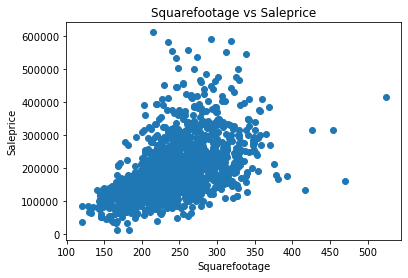

In [74]:
plt.scatter(x=df['gr_liv_area/totrms_abvgrd'], y=df['saleprice'])
plt.xlabel('Squarefootage')
plt.ylabel('Saleprice')
plt.title('Squarefootage vs Saleprice');

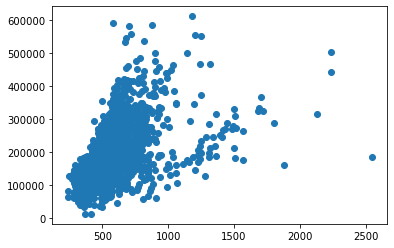

In [38]:
plt.scatter(x=df['gr_liv_area/bedroom_abvgr'], y=df['saleprice'])

In [51]:
df['sf/allrms_bath_halfbath'] = df['gr_liv_area']/(df['totrms_abvgrd']+df['full_bath']+(df['half_bath']*.5))

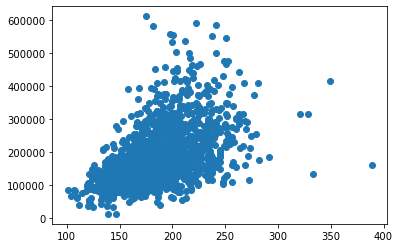

In [57]:
plt.scatter(x=df['sf/allrms_bath_halfbath'], y=df['saleprice'])

In [63]:
df['ms_subclass'].value_counts()

20     767
60     394
50     198
120    131
30     101
70      89
160     88
80      85
90      74
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: ms_subclass, dtype: int64

In [ ]:
### all three are similar pick between first or third

In [22]:
df = pd.read_csv('datasets/train.csv')
df = df.rename(str.lower, axis=1)
df.columns = [name.replace(' ', '_') if ' ' in name else name for name in df.columns]

# Model 2
df['age'] = [df['year_built'].max()-year for year in df['year_built']]
df['age*overall_qual'] = df['age']*df['overall_qual']

# Model 3
kitchen_qual_order = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
df['kitchen_qual_order'] = [kitchen_qual_order[n] for n in df['kitchen_qual']]

# Model 4
df['gr_liv_area/totrms_abvgrd'] = df['gr_liv_area']/df['totrms_abvgrd']
df['since_remod/add'] = [2010-year for year in df['year_remod/add']]

# Model 5
df.drop(index=1712, inplace=True)
df.drop(index=1327, inplace=True)

# Model 6
df['before_1940'] = [1 if year < 1940 else 0 for year in df['year_built']]
df['over_10'] = [1 if age > 10 else 0 for age in df['age']]

# Model 7
df['before_1940'] = [1 if year < 1940 else 0 for year in df['year_built']]
df['over_10'] = [1 if age > 10 else 0 for age in df['age']]

df = pd.get_dummies(df, columns=['neighborhood'], drop_first=True);

In [16]:
features_8 = df[['gr_liv_area', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd',
                 'since_remod/add', 'garage_area', 'kitchen_qual_order', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1', 'neighborhood', 'fireplaces']]
features_8 = pd.get_dummies(features_8, columns=['neighborhood'], drop_first=True);

In [23]:
df.to_csv('train_only_features_cleaned_dummies.csv', index=False)

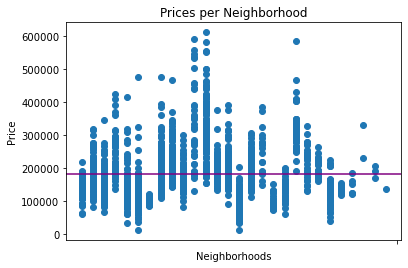

In [86]:
plt.scatter(x=df['neighborhood'], y=df['saleprice'])
plt.axhline(df['saleprice'].mean(), color='purple')
plt.xticks(ticks='')
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.title('Prices per Neighborhood');

* Interesting behavior of neighborhoods vs price. Some houses always start off higher--a good way to capture that occurence